# Data visualization

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [4]:
mi = gpd.read_file('milano.shp')
edicole = pd.read_csv('~/Desktop/Project/infoMilano/ds57_economia_edicole__final.csv', sep=';')
local = pd.read_csv('~/Desktop/Project/infoMilano/economia_esercizi_vicinato_sede_fissa_coord.csv', sep=';')
spettacolo = pd.read_csv('~/Desktop/Project/infoMilano/economia_locale_pubblico_spettacolo_coord.csv', sep=';')
grandi = pd.read_csv('~/Desktop/Project/infoMilano/economia_media_grande_distribuzione_coord.csv', sep=';')
pane = pd.read_csv('~/Desktop/Project/infoMilano/economia_panificatori_coord.csv', sep=';')
beauty = pd.read_csv('~/Desktop/Project/infoMilano/economia_parrucchieri_estetisti_centri_abbronzatura_coord.csv', sep=';')
fuoriPiano =pd.read_csv('~/Desktop/Project/infoMilano/economia_pubblici_esercizi_fuori_piano_2018_coord.csv', sep=';')
inPiano =pd.read_csv('~/Desktop/Project/infoMilano/economia_pubblici_esercizi_in_piano_coord.csv', sep=';')

First, I would like to recall the choropleth map of the rent values (per square meter) divided by neighborhood in the city of Milan, as shown in the data preparation part.

[]

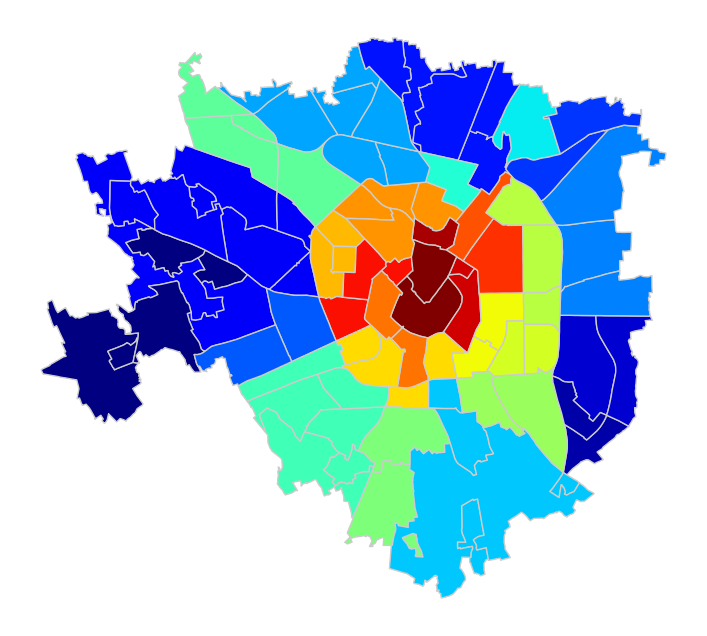

In [5]:
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
mi.plot(column='Rent', ax=ax, edgecolor='0.8', linewidth=1, cmap='jet')

plt.plot()

After having imported all the required packages and CSVs, retrieved from the Milano Open Data portal, some data visualization is performed. First, I visualize all the businesses on the territory of the city, to investigate if there is some visual suggestions about the high prices of the city center, other than the fact that it is a central position.

[]

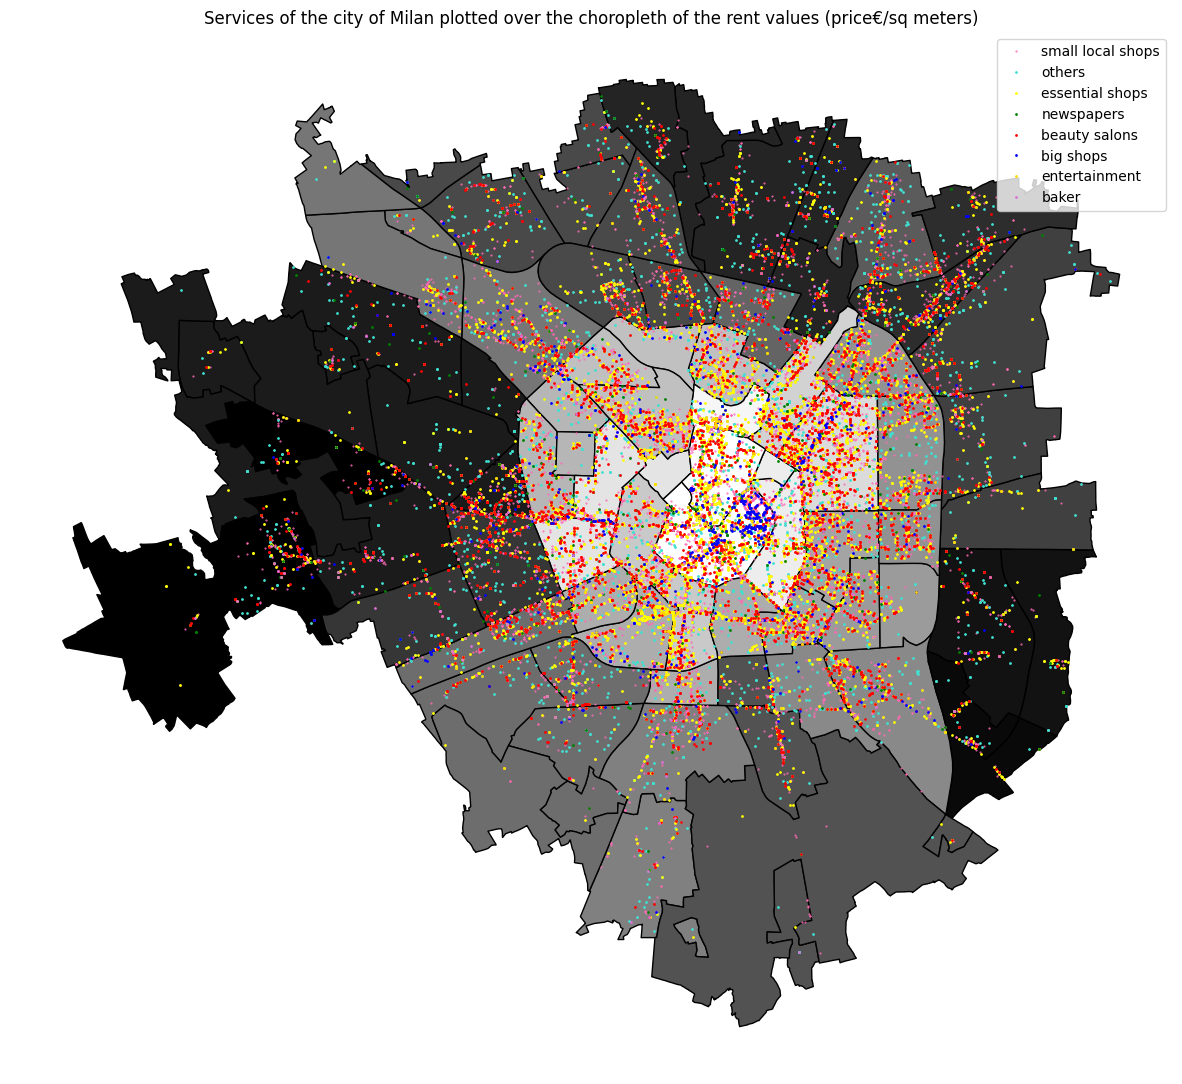

In [52]:
base = mi.plot(column = 'Rent', cmap='gray', edgecolor='black', figsize=(15,15))
base.set_title('Services of the city of Milan plotted over the choropleth of the rent values (price€/sq meters)')
local.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=0.5, c = 'hotpink', label='small local shops')
fuoriPiano.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'turquoise', label='others')
inPiano.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'yellow', label='essential shops')
edicole.plot(ax = base, x = 'LONG_X_4326', y= 'LAT_Y_4326',linestyle="" ,marker='o', markersize=1, c = 'green', label='newspapers')
beauty.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'red', label='beauty salons')
grandi.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'blue', label='big shops')
spettacolo.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'gold', label='entertainment')
pane.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'orchid', label='baker')
plt.axis('off')
plt.plot()

As can be seen, the city center (including areas such that Duomo and Brera) are very well served by a varied amount of services. So they high prices are not only influenced by the position, but also by the quantity of services. It can be noticed that the big shops and the entertainment locations are present only in central areas, with few exceptions.

Instead, the areas neighboring the center have availability of services only in the main roads of the city, whose shape can be guessed by the distribution of the points. This means that some roads might have higher prices in rent, due to being better served by shops, while some lower, which turns the average to a lower price.


In the following plots, the scatterplot can show the intensity of the presence of four different kind of services, to investigate the developement of the town.

[]

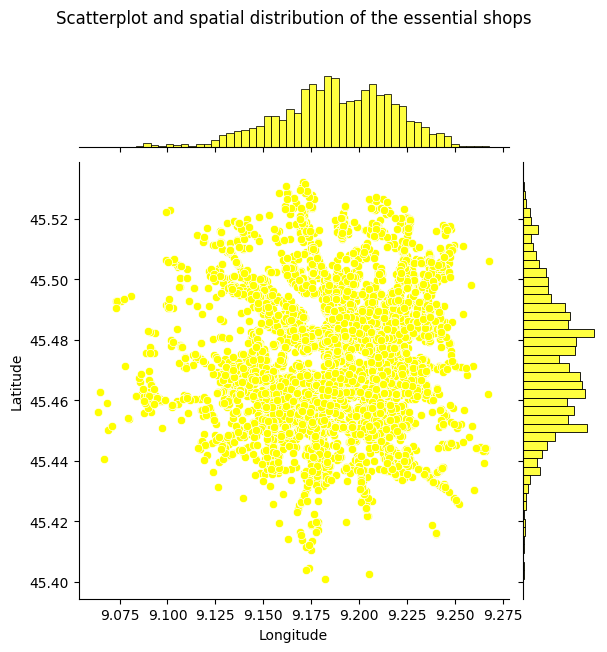

In [51]:
import seaborn as sns

p = sns.jointplot(x='LONG_WGS84', y='LAT_WGS84', color="yellow", data=inPiano)
plt.title('Scatterplot and spatial distribution of the essential shops', y=1.3)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.plot()

The essential shops seem to serve well all areas of the city. Of course, some areas have sparse coverage, but it is in the most rural areas of the city.

[]

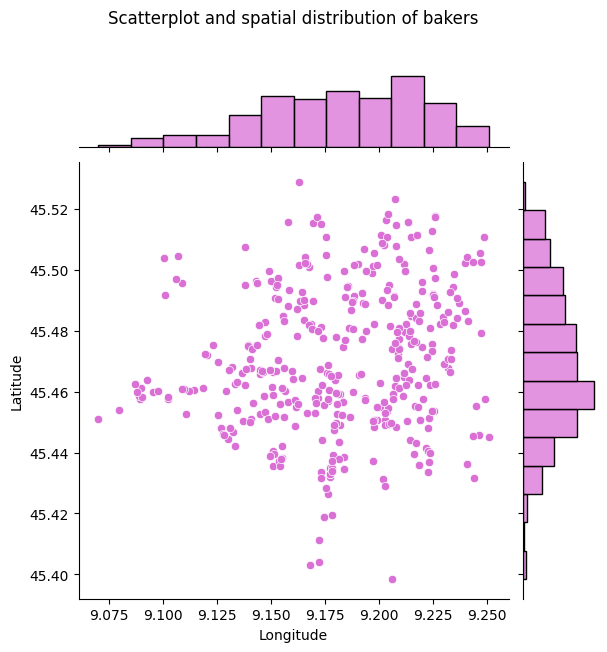

In [55]:
sns.jointplot(x='LONG_WGS84', y='LAT_WGS84', color="orchid", data=pane)
plt.title('Scatterplot and spatial distribution of bakers', y=1.3)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.plot()

Bakers seem to be sparse and seem to not cover some spots of the city center, maybe substituted by restaurants and shops for tourists. 

[]

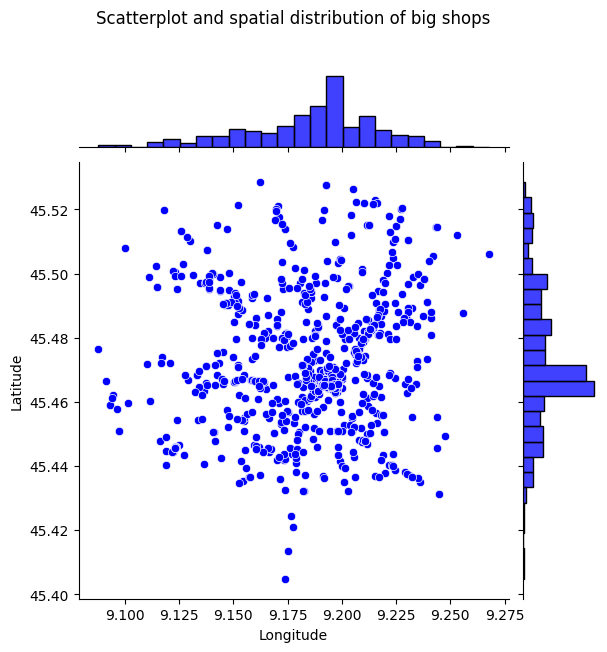

In [58]:
sns.jointplot(x='LONG_WGS84', y='LAT_WGS84', color="blue", data=grandi)
plt.title('Scatterplot and spatial distribution of big shops', y=1.3)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.plot()

Big shops are all the shops which cover an area greater than 250 square meters. They are more present in the city center (which could explain the scarsity of bakers in the center) and are present in peripherical areas only in the major roads.

[]

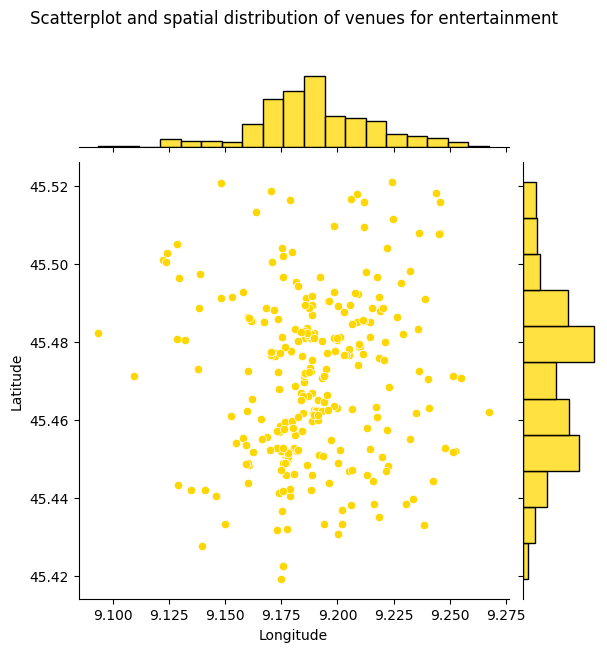

In [59]:
sns.jointplot(x='LONG_WGS84', y='LAT_WGS84', color="gold", data=spettacolo)
plt.title('Scatterplot and spatial distribution of venues for entertainment', y=1.3)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.plot()

As a final example the distrubution of the entertainment venues is shown. In this case, the most venues seem to be developing from north to south, especially in the areas of the Duomo and below. Those are the oldest areas of the city, which would mean that those venues hold historical value as wel. 